In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
trips_per_day = pd.read_csv('trips_per_day.csv')

In [3]:
trips_per_day = trips_per_day.drop('Unnamed: 0', axis=1)

In [4]:
trips_per_day.head()

,Date,from_station_name,Mean_Temperature_F,Events,number_of_trips
0,01/01/2015,12th Ave & E Denny Way,35.0,BLANK,10
1,01/01/2015,12th Ave & E Mercer St,35.0,BLANK,6
2,01/01/2015,15th Ave E & E Thomas St,35.0,BLANK,4
3,01/01/2015,1st Ave & Marion St,35.0,BLANK,8
4,01/01/2015,2nd Ave & Blanchard St,35.0,BLANK,14


In [5]:
# encoding station data
trips_per_day1 = pd.get_dummies(trips_per_day, columns=['from_station_name'])
trips_per_day1.sample(5)

,Date,Mean_Temperature_F,Events,number_of_trips,from_station_name_12th Ave & E Denny Way,from_station_name_12th Ave & E Mercer St,from_station_name_12th Ave & E Yesler Way,from_station_name_12th Ave & NE Campus Pkwy,from_station_name_15th Ave E & E Thomas St,from_station_name_15th Ave NE & NE 40th St,...,from_station_name_Summit Ave & E Denny Way,from_station_name_Summit Ave E & E Republican St,from_station_name_Terry Ave & Stewart St,from_station_name_Thomas St & 5th Ave N,from_station_name_UW Engineering Library / E Stevens Way NE & Jefferson Rd,from_station_name_UW Intramural Activities Building,from_station_name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,from_station_name_UW McCarty Hall / Whitman Ct,from_station_name_Union St & 4th Ave,from_station_name_Westlake Ave & 6th Ave
5225,05/12/2014,50.0,Rain,14,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4377,05/02/2016,48.0,Rain,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
31114,30/01/2016,42.0,Rain,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
24077,23/06/2016,62.0,Rain,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27391,26/07/2015,66.0,Rain,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
trips_per_day1.columns

Index(['Date', 'Mean_Temperature_F', 'Events', 'number_of_trips',
       'from_station_name_12th Ave & E Denny Way',
       'from_station_name_12th Ave & E Mercer St',
       'from_station_name_12th Ave & E Yesler Way',
       'from_station_name_12th Ave & NE Campus Pkwy',
       'from_station_name_15th Ave E & E Thomas St',
       'from_station_name_15th Ave NE & NE 40th St',
       'from_station_name_1st Ave & Marion St',
       'from_station_name_2nd Ave & Blanchard St',
       'from_station_name_2nd Ave & Pine St',
       'from_station_name_2nd Ave & Spring St',
       'from_station_name_2nd Ave & Vine St',
       'from_station_name_3rd Ave & Broad St',
       'from_station_name_6th Ave & Blanchard St',
       'from_station_name_6th Ave S & S King St',
       'from_station_name_7th Ave & Union St', 'from_station_name_8D OPS 02',
       'from_station_name_9th Ave N & Mercer St',
       'from_station_name_Bellevue Ave & E Pine St',
       'from_station_name_Broadway and E Denny Way',

In [7]:
X = trips_per_day1[['from_station_name_12th Ave & E Denny Way',
       'from_station_name_12th Ave & E Mercer St',
       'from_station_name_12th Ave & E Yesler Way',
       'from_station_name_12th Ave & NE Campus Pkwy',
       'from_station_name_15th Ave E & E Thomas St',
       'from_station_name_15th Ave NE & NE 40th St',
       'from_station_name_1st Ave & Marion St',
       'from_station_name_2nd Ave & Blanchard St',
       'from_station_name_2nd Ave & Pine St',
       'from_station_name_2nd Ave & Spring St',
       'from_station_name_2nd Ave & Vine St',
       'from_station_name_3rd Ave & Broad St',
       'from_station_name_6th Ave & Blanchard St',
       'from_station_name_6th Ave S & S King St',
       'from_station_name_7th Ave & Union St', 'from_station_name_8D OPS 02',
       'from_station_name_9th Ave N & Mercer St',
       'from_station_name_Bellevue Ave & E Pine St',
       'from_station_name_Broadway and E Denny Way',
       'from_station_name_Burke Museum / E Stevens Way NE & Memorial Way NE',
       'from_station_name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE',
       'from_station_name_Cal Anderson Park / 11th Ave & Pine St',
       'from_station_name_Children\'s Hospital / Sandpoint Way NE & 40th Ave NE',
       'from_station_name_City Hall / 4th Ave & James St',
       'from_station_name_Dexter Ave & Denny Way',
       'from_station_name_Dexter Ave N & Aloha St',
       'from_station_name_E Blaine St & Fairview Ave E',
       'from_station_name_E Harrison St & Broadway Ave E',
       'from_station_name_E Pine St & 16th Ave',
       'from_station_name_Eastlake Ave E & E Allison St',
       'from_station_name_Fred Hutchinson Cancer Research Center / Fairview Ave N & Ward St',
       'from_station_name_Frye Art Museum / Terry Ave & Columbia St',
       'from_station_name_Harvard Ave & E Pine St',
       'from_station_name_Key Arena / 1st Ave N & Harrison St',
       'from_station_name_King Street Station Plaza / 2nd Ave Extension S & S Jackson St',
       'from_station_name_Lake Union Park / Valley St & Boren Ave N',
       'from_station_name_Mercer St & 9th Ave N',
       'from_station_name_NE 42nd St & University Way NE',
       'from_station_name_NE 47th St & 12th Ave NE',
       'from_station_name_NE Pacific St/UW Medical Center',
       'from_station_name_Occidental Park / Occidental Ave S & S Washington St',
       'from_station_name_PATH / 9th Ave & Westlake Ave',
       'from_station_name_Pier 66 / Alaskan Way & Bell St',
       'from_station_name_Pier 69 / Alaskan Way & Clay St',
       'from_station_name_Pine St & 9th Ave', 'from_station_name_Pronto shop',
       'from_station_name_Pronto shop 2',
       'from_station_name_REI / Yale Ave N & John St',
       'from_station_name_Republican St & Westlake Ave N',
       'from_station_name_Seattle Aquarium / Alaskan Way S & Elliott Bay Trail',
       'from_station_name_Seattle University / E Columbia St & 12th Ave',
       'from_station_name_Summit Ave & E Denny Way',
       'from_station_name_Summit Ave E & E Republican St',
       'from_station_name_Terry Ave & Stewart St',
       'from_station_name_Thomas St & 5th Ave N',
       'from_station_name_UW Engineering Library / E Stevens Way NE & Jefferson Rd',
       'from_station_name_UW Intramural Activities Building',
       'from_station_name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd',
       'from_station_name_UW McCarty Hall / Whitman Ct',
       'from_station_name_Union St & 4th Ave',
       'from_station_name_Westlake Ave & 6th Ave']]

y = trips_per_day1['number_of_trips']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =42) 

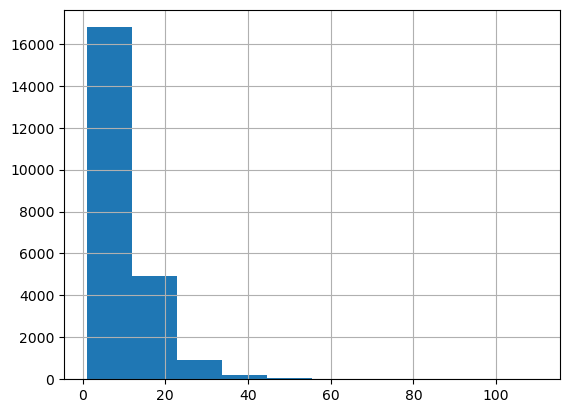

In [8]:
y_train.hist();

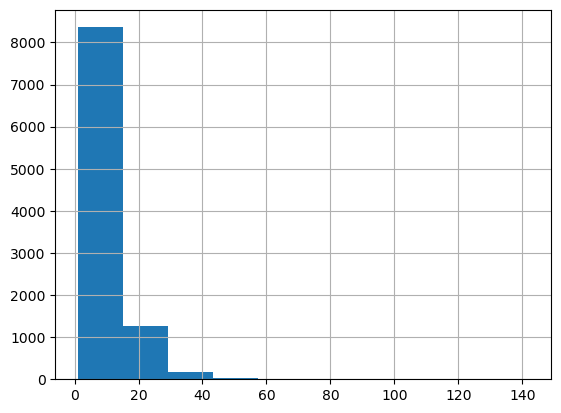

In [9]:
y_test.hist();

In [10]:
scaler =  StandardScaler()
scaler_target = StandardScaler()

In [11]:
cols = list(X_train.columns)
cols

['from_station_name_12th Ave & E Denny Way',
 'from_station_name_12th Ave & E Mercer St',
 'from_station_name_12th Ave & E Yesler Way',
 'from_station_name_12th Ave & NE Campus Pkwy',
 'from_station_name_15th Ave E & E Thomas St',
 'from_station_name_15th Ave NE & NE 40th St',
 'from_station_name_1st Ave & Marion St',
 'from_station_name_2nd Ave & Blanchard St',
 'from_station_name_2nd Ave & Pine St',
 'from_station_name_2nd Ave & Spring St',
 'from_station_name_2nd Ave & Vine St',
 'from_station_name_3rd Ave & Broad St',
 'from_station_name_6th Ave & Blanchard St',
 'from_station_name_6th Ave S & S King St',
 'from_station_name_7th Ave & Union St',
 'from_station_name_8D OPS 02',
 'from_station_name_9th Ave N & Mercer St',
 'from_station_name_Bellevue Ave & E Pine St',
 'from_station_name_Broadway and E Denny Way',
 'from_station_name_Burke Museum / E Stevens Way NE & Memorial Way NE',
 'from_station_name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE',
 'from_station_name_Cal Ande

In [12]:
X_train

,from_station_name_12th Ave & E Denny Way,from_station_name_12th Ave & E Mercer St,from_station_name_12th Ave & E Yesler Way,from_station_name_12th Ave & NE Campus Pkwy,from_station_name_15th Ave E & E Thomas St,from_station_name_15th Ave NE & NE 40th St,from_station_name_1st Ave & Marion St,from_station_name_2nd Ave & Blanchard St,from_station_name_2nd Ave & Pine St,from_station_name_2nd Ave & Spring St,...,from_station_name_Summit Ave & E Denny Way,from_station_name_Summit Ave E & E Republican St,from_station_name_Terry Ave & Stewart St,from_station_name_Thomas St & 5th Ave N,from_station_name_UW Engineering Library / E Stevens Way NE & Jefferson Rd,from_station_name_UW Intramural Activities Building,from_station_name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,from_station_name_UW McCarty Hall / Whitman Ct,from_station_name_Union St & 4th Ave,from_station_name_Westlake Ave & 6th Ave
24424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5090,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test) 

In [14]:
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1)) 
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [15]:
y_train

array([[-0.92283904],
       [ 0.84837316],
       [ 0.1671377 ],
       ...,
       [ 3.16457374],
       [-0.37785067],
       [ 3.16457374]])

In [16]:
X_train.describe()

,from_station_name_12th Ave & E Denny Way,from_station_name_12th Ave & E Mercer St,from_station_name_12th Ave & E Yesler Way,from_station_name_12th Ave & NE Campus Pkwy,from_station_name_15th Ave E & E Thomas St,from_station_name_15th Ave NE & NE 40th St,from_station_name_1st Ave & Marion St,from_station_name_2nd Ave & Blanchard St,from_station_name_2nd Ave & Pine St,from_station_name_2nd Ave & Spring St,...,from_station_name_Summit Ave & E Denny Way,from_station_name_Summit Ave E & E Republican St,from_station_name_Terry Ave & Stewart St,from_station_name_Thomas St & 5th Ave N,from_station_name_UW Engineering Library / E Stevens Way NE & Jefferson Rd,from_station_name_UW Intramural Activities Building,from_station_name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,from_station_name_UW McCarty Hall / Whitman Ct,from_station_name_Union St & 4th Ave,from_station_name_Westlake Ave & 6th Ave
count,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,...,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04,2.290000e+04
mean,-3.351031e-17,1.799628e-17,-1.861684e-18,3.847480e-17,3.537200e-17,3.537200e-17,-2.358133e-17,-2.978694e-17,-1.582431e-17,-1.303179e-17,...,2.978694e-17,3.288975e-17,4.809350e-17,5.585052e-18,6.515894e-17,6.205613e-19,-5.057575e-17,-2.606358e-17,-4.343929e-17,4.033649e-17
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,...,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-1.426979e-01,-1.486381e-01,-1.071639e-01,-1.365209e-01,-1.434924e-01,-1.365209e-01,-1.460080e-01,-1.438091e-01,-1.409356e-01,-1.418993e-01,...,-1.430162e-01,-1.442829e-01,-1.092294e-01,-4.535000e-02,-1.304200e-01,-1.254842e-01,-1.165688e-01,-8.308564e-02,-1.082014e-01,-1.450694e-01
25%,-1.426979e-01,-1.486381e-01,-1.071639e-01,-1.365209e-01,-1.434924e-01,-1.365209e-01,-1.460080e-01,-1.438091e-01,-1.409356e-01,-1.418993e-01,...,-1.430162e-01,-1.442829e-01,-1.092294e-01,-4.535000e-02,-1.304200e-01,-1.254842e-01,-1.165688e-01,-8.308564e-02,-1.082014e-01,-1.450694e-01
50%,-1.426979e-01,-1.486381e-01,-1.071639e-01,-1.365209e-01,-1.434924e-01,-1.365209e-01,-1.460080e-01,-1.438091e-01,-1.409356e-01,-1.418993e-01,...,-1.430162e-01,-1.442829e-01,-1.092294e-01,-4.535000e-02,-1.304200e-01,-1.254842e-01,-1.165688e-01,-8.308564e-02,-1.082014e-01,-1.450694e-01
75%,-1.426979e-01,-1.486381e-01,-1.071639e-01,-1.365209e-01,-1.434924e-01,-1.365209e-01,-1.460080e-01,-1.438091e-01,-1.409356e-01,-1.418993e-01,...,-1.430162e-01,-1.442829e-01,-1.092294e-01,-4.535000e-02,-1.304200e-01,-1.254842e-01,-1.165688e-01,-8.308564e-02,-1.082014e-01,-1.450694e-01
max,7.007811e+00,6.727750e+00,9.331502e+00,7.324885e+00,6.969010e+00,7.324885e+00,6.848938e+00,6.953664e+00,7.095442e+00,7.047249e+00,...,6.992215e+00,6.930830e+00,9.155043e+00,2.205072e+01,7.667537e+00,7.969131e+00,8.578627e+00,1.203577e+01,9.242029e+00,6.893254e+00


In [17]:
print(y_train.std(), y_train.mean())
print(y_test.std(), y_test.mean())

1.0 -1.0549542801678343e-16
1.0161486391359706 -0.0037437785456346908


In [18]:
X_train.columns

Index(['from_station_name_12th Ave & E Denny Way',
       'from_station_name_12th Ave & E Mercer St',
       'from_station_name_12th Ave & E Yesler Way',
       'from_station_name_12th Ave & NE Campus Pkwy',
       'from_station_name_15th Ave E & E Thomas St',
       'from_station_name_15th Ave NE & NE 40th St',
       'from_station_name_1st Ave & Marion St',
       'from_station_name_2nd Ave & Blanchard St',
       'from_station_name_2nd Ave & Pine St',
       'from_station_name_2nd Ave & Spring St',
       'from_station_name_2nd Ave & Vine St',
       'from_station_name_3rd Ave & Broad St',
       'from_station_name_6th Ave & Blanchard St',
       'from_station_name_6th Ave S & S King St',
       'from_station_name_7th Ave & Union St', 'from_station_name_8D OPS 02',
       'from_station_name_9th Ave N & Mercer St',
       'from_station_name_Bellevue Ave & E Pine St',
       'from_station_name_Broadway and E Denny Way',
       'from_station_name_Burke Museum / E Stevens Way NE & Memor

In [19]:
cols = ['from_station_name_12th Ave & E Denny Way',
       'from_station_name_12th Ave & E Mercer St',
       'from_station_name_12th Ave & E Yesler Way',
       'from_station_name_12th Ave & NE Campus Pkwy',
       'from_station_name_15th Ave E & E Thomas St',
       'from_station_name_15th Ave NE & NE 40th St',
       'from_station_name_1st Ave & Marion St',
       'from_station_name_2nd Ave & Blanchard St',
       'from_station_name_2nd Ave & Pine St',
       'from_station_name_2nd Ave & Spring St',
       'from_station_name_2nd Ave & Vine St',
       'from_station_name_3rd Ave & Broad St',
       'from_station_name_6th Ave & Blanchard St',
       'from_station_name_6th Ave S & S King St',
       'from_station_name_7th Ave & Union St', 'from_station_name_8D OPS 02',
       'from_station_name_9th Ave N & Mercer St',
       'from_station_name_Bellevue Ave & E Pine St',
       'from_station_name_Broadway and E Denny Way',
       'from_station_name_Burke Museum / E Stevens Way NE & Memorial Way NE',
       'from_station_name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE',
       'from_station_name_Cal Anderson Park / 11th Ave & Pine St',
       'from_station_name_Children\'s Hospital / Sandpoint Way NE & 40th Ave NE',
       'from_station_name_City Hall / 4th Ave & James St',
       'from_station_name_Dexter Ave & Denny Way',
       'from_station_name_Dexter Ave N & Aloha St',
       'from_station_name_E Blaine St & Fairview Ave E',
       'from_station_name_E Harrison St & Broadway Ave E',
       'from_station_name_E Pine St & 16th Ave',
       'from_station_name_Eastlake Ave E & E Allison St',
       'from_station_name_Fred Hutchinson Cancer Research Center / Fairview Ave N & Ward St',
       'from_station_name_Frye Art Museum / Terry Ave & Columbia St',
       'from_station_name_Harvard Ave & E Pine St',
       'from_station_name_Key Arena / 1st Ave N & Harrison St',
       'from_station_name_King Street Station Plaza / 2nd Ave Extension S & S Jackson St',
       'from_station_name_Lake Union Park / Valley St & Boren Ave N',
       'from_station_name_Mercer St & 9th Ave N',
       'from_station_name_NE 42nd St & University Way NE',
       'from_station_name_NE 47th St & 12th Ave NE',
       'from_station_name_NE Pacific St/UW Medical Center',
       'from_station_name_Occidental Park / Occidental Ave S & S Washington St',
       'from_station_name_PATH / 9th Ave & Westlake Ave',
       'from_station_name_Pier 66 / Alaskan Way & Bell St',
       'from_station_name_Pier 69 / Alaskan Way & Clay St',
       'from_station_name_Pine St & 9th Ave', 'from_station_name_Pronto shop',
       'from_station_name_Pronto shop 2',
       'from_station_name_REI / Yale Ave N & John St',
       'from_station_name_Republican St & Westlake Ave N',
       'from_station_name_Seattle Aquarium / Alaskan Way S & Elliott Bay Trail',
       'from_station_name_Seattle University / E Columbia St & 12th Ave',
       'from_station_name_Summit Ave & E Denny Way',
       'from_station_name_Summit Ave E & E Republican St',
       'from_station_name_Terry Ave & Stewart St',
       'from_station_name_Thomas St & 5th Ave N',
       'from_station_name_UW Engineering Library / E Stevens Way NE & Jefferson Rd',
       'from_station_name_UW Intramural Activities Building',
       'from_station_name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd',
       'from_station_name_UW McCarty Hall / Whitman Ct',
       'from_station_name_Union St & 4th Ave',
       'from_station_name_Westlake Ave & 6th Ave']

In [20]:
# call the method
regressor = LinearRegression(fit_intercept = False) 
# fit_intercept = false, do not try and fit. If scaled the mean of every feature already is 0. 
# This kind of model will always go through 0

# Fit the model <- THIS IS ML
regressor.fit(X_train[cols], y_train) # Both the training data's

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

In [21]:
y_pred

array([[-0.34619069],
       [-0.43020463],
       [ 0.18715167],
       ...,
       [ 1.45089793],
       [-0.0039742 ],
       [-0.46368337]])

In [23]:
# first we need to reverse the transformation so we have meanginful results
# calling inverse_transform on our scaler
y_true = scaler_target.inverse_transform(y_test) # <- observed y values
y_pred_inverse = scaler_target.inverse_transform(y_pred) # <- predicted y

In [24]:
# Calculating the errors
mae = mean_absolute_error(y_true, y_pred_inverse)
mse = mean_squared_error(y_true, y_pred_inverse)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred_inverse)

In [25]:
print('MAE = ', mae.round(2))
print('MSE = ', mse.round(2))
print('RMSE = ', rmse.round(2))
print('R^2 = ', r2.round(2))

MAE =  119240196.03
MSE =  6.9775930707784925e+19
RMSE =  8353198830.85
R^2 =  -1.254427729744081e+18
